<a href="https://colab.research.google.com/github/iamhannahkoh/DeepLearning/blob/main/Augmentation_with_ImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Augmentation with ImageDataGenerator:  A Technique to Avoid Overfitting

**About the Data**

This exercise uses a subset of the Dogs vs. Cats dataset provided by Kaggle. The original training archive contains 25,000 images of dogs and cats. In this exercise, we will only use a part of the Kaggle dataset, train an algorithm on these training images, and predict the labels for images that the model hasn't seen previously (1 = dog and 0 = cat). You can find more information on the full dataset on the Kaggle website (https://www.kaggle.com/c/dogs-vs-cats/overview).  

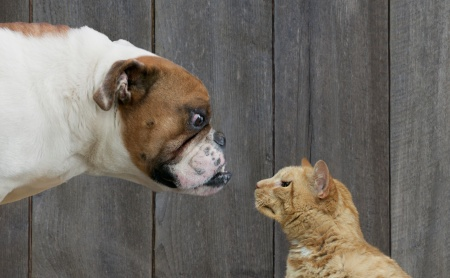

### 1. Prepare data

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 1. Set up data and directories

In [ ]:
# Set up data
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-01-08 01:31:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c09::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   163MB/s    in 0.4s    

2021-01-08 01:31:09 (163 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Set directories
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogss_dir = os.path.join(validation_dir, 'dogs')

### 2. Try wihtout Augmentation


In [ ]:
# Image Generator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size =20,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Build the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.compile(optimizer =RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])


history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose =2)

Epoch 1/100
100/100 - 16s - loss: 0.6917 - accuracy: 0.5245 - val_loss: 0.6724 - val_accuracy: 0.6240
Epoch 2/100
100/100 - 9s - loss: 0.6590 - accuracy: 0.6070 - val_loss: 0.6698 - val_accuracy: 0.5910
Epoch 3/100
100/100 - 9s - loss: 0.6178 - accuracy: 0.6685 - val_loss: 0.6012 - val_accuracy: 0.6710
Epoch 4/100
100/100 - 9s - loss: 0.5732 - accuracy: 0.7090 - val_loss: 0.6032 - val_accuracy: 0.6640
Epoch 5/100
100/100 - 9s - loss: 0.5394 - accuracy: 0.7240 - val_loss: 0.5977 - val_accuracy: 0.6760
Epoch 6/100
100/100 - 8s - loss: 0.5043 - accuracy: 0.7520 - val_loss: 0.5790 - val_accuracy: 0.7020
Epoch 7/100
100/100 - 8s - loss: 0.4798 - accuracy: 0.7640 - val_loss: 0.5369 - val_accuracy: 0.7270
Epoch 8/100
100/100 - 8s - loss: 0.4501 - accuracy: 0.7835 - val_loss: 0.6068 - val_accuracy: 0.6740
Epoch 9/100
100/100 - 9s - loss: 0.4212 - accuracy: 0.8100 - val_loss: 0.5207 - val_accuracy: 0.7460
Epoch 10/100
100/100 - 8s - loss: 0.3959 - accuracy: 0.8270 - val_loss: 0.5223 - val_accur

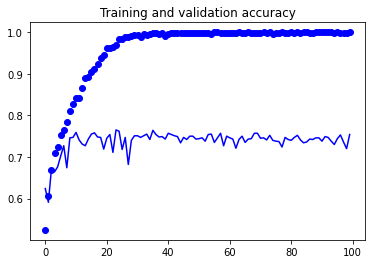

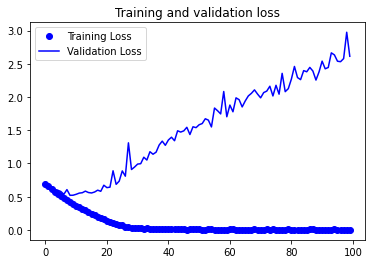

In [ ]:
# Plot accuracy 
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = "Validation accuracy")
plt.title('Training and validation accuracy')


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

You can see there is an overfitting issue. 

### 3. Retrain the model with augmentation

In [ ]:
# Image Generator with Augmentation

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range = 40,
                                   width_shift_range =0.2,
                                   height_shift_range =0.2,
                                   shear_range =0.2,
                                   zoom_range =0.2,
                                   horizontal_flip=True,
                                   fill_mode ='nearest')


test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size =20,
                                                        class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Build the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.compile(optimizer =RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])


history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose =2)

Epoch 1/100
100/100 - 18s - loss: 0.6897 - accuracy: 0.5255 - val_loss: 0.7046 - val_accuracy: 0.5070
Epoch 2/100
100/100 - 17s - loss: 0.6760 - accuracy: 0.5805 - val_loss: 0.6529 - val_accuracy: 0.6130
Epoch 3/100
100/100 - 17s - loss: 0.6625 - accuracy: 0.6075 - val_loss: 0.6444 - val_accuracy: 0.6390
Epoch 4/100
100/100 - 17s - loss: 0.6522 - accuracy: 0.6025 - val_loss: 0.6214 - val_accuracy: 0.6530
Epoch 5/100
100/100 - 17s - loss: 0.6413 - accuracy: 0.6290 - val_loss: 0.6068 - val_accuracy: 0.6470
Epoch 6/100
100/100 - 17s - loss: 0.6279 - accuracy: 0.6475 - val_loss: 0.5891 - val_accuracy: 0.6890
Epoch 7/100
100/100 - 17s - loss: 0.6140 - accuracy: 0.6645 - val_loss: 0.5767 - val_accuracy: 0.6800
Epoch 8/100
100/100 - 17s - loss: 0.5968 - accuracy: 0.6740 - val_loss: 0.5865 - val_accuracy: 0.6770
Epoch 9/100
100/100 - 17s - loss: 0.5915 - accuracy: 0.6860 - val_loss: 0.6323 - val_accuracy: 0.6370
Epoch 10/100
100/100 - 17s - loss: 0.5814 - accuracy: 0.6940 - val_loss: 0.5565 - 

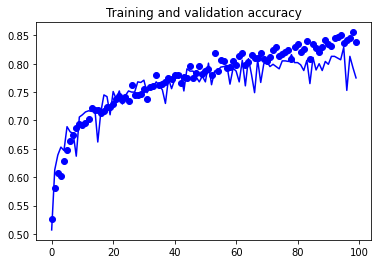

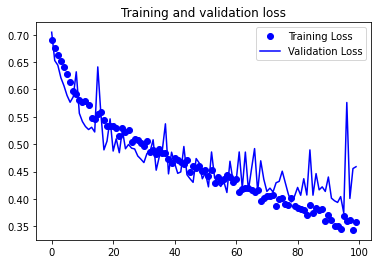

In [ ]:
# Plot accuracy 
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = "Validation accuracy")
plt.title('Training and validation accuracy')


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The overfitting part looks better now but the overall accuracy isn't that great. We can use pre-trained weights to improve the accuracy. Please look at "Computer Vision with Transfer Learning" in the repository to see how a model can use pre-defined weights for a better prediction. 

### 4. Test with previously unseen images

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
# predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving woof_meow.jpg to woof_meow (1).jpg
[1.]
woof_meow.jpg is a dog


Data source: DeepLearning.AI TensorFlow Developer Professional Certificate Specialization on Coursera